In [1]:

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("max_columns", None)
pd.set_option("max_rows", 200)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from utils import *

In [5]:
SEED = 8

In [6]:
INPUT_FILE = "concrete_wd_features.csv"
INPUT_DIR = "./"

In [7]:
df = read_input(INPUT_DIR, INPUT_FILE)

In [8]:
df.shape

(1030, 17)

In [9]:
# Separating dependent and independent variables
X = df.drop('strength',axis=1)
Y = df['strength']

In [10]:
features = X.columns.tolist()

In [11]:
# Splitting the data into train and test
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y , test_size=0.3, random_state=SEED)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
k =  KFold(random_state=SEED, n_splits=5)
# KFold will split the data in 5 equal parts

____________

### 2. Hyper Parameter Tuning *(15 marks)*

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

**Grid Search on Random Forest**

In [15]:
['n_estimators', 'max_depth', 'min_samples_split']

['n_estimators', 'max_depth', 'min_samples_split']

In [16]:

rf = RandomForestRegressor(random_state=SEED,
                           n_jobs=-1)

params = {
    #'bootstrap': [True,False],
    'max_depth': [1,3,5,7,10],
    #'max_features': ['sqrt','log2'],
    #'min_samples_leaf': [1,3, 4],
    'min_samples_split': [5,30,50,100],
    'n_estimators': [25,100,200,300]
}    

grid = RandomizedSearchCV(rf,
                          params,
                          cv = k,
                          n_jobs=-1,
                          n_iter=20)

grid.fit(X,Y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
 

In [17]:
grid.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}

In [18]:
grid_results = pd.DataFrame(grid.cv_results_)

In [19]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142207,0.012409,0.118035,0.015646,25,30,7,"{'n_estimators': 25, 'min_samples_split': 30, ...",0.829622,0.857974,0.856027,0.874726,0.833773,0.850425,0.016667,2
1,0.525051,0.087737,0.113607,0.002622,200,30,5,"{'n_estimators': 200, 'min_samples_split': 30,...",0.813517,0.824246,0.841956,0.850799,0.801239,0.826351,0.018116,4
2,0.306849,0.018119,0.110955,0.004182,100,100,1,"{'n_estimators': 100, 'min_samples_split': 100...",0.405726,0.349298,0.378335,0.313558,0.344414,0.358266,0.031389,19
3,0.768129,0.087259,0.113166,0.008273,300,30,3,"{'n_estimators': 300, 'min_samples_split': 30,...",0.691099,0.674563,0.730851,0.734178,0.627899,0.691718,0.039247,11
4,0.189346,0.062524,0.112389,0.002610,25,30,1,"{'n_estimators': 25, 'min_samples_split': 30, ...",0.407031,0.341103,0.388597,0.324772,0.334754,0.359252,0.032442,18
5,0.769768,0.171202,0.107276,0.001981,200,5,7,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.867489,0.899100,0.882284,0.911326,0.879459,0.887932,0.015451,1
6,0.459616,0.107112,0.114292,0.008948,100,50,1,"{'n_estimators': 100, 'min_samples_split': 50,...",0.405726,0.349298,0.378335,0.313558,0.344414,0.358266,0.031389,19
7,0.493898,0.073570,0.112006,0.002212,200,30,1,"{'n_estimators': 200, 'min_samples_split': 30,...",0.406788,0.356472,0.377964,0.326913,0.338175,0.361262,0.028592,16
8,0.634738,0.056915,0.108659,0.003732,200,100,5,"{'n_estimators': 200, 'min_samples_split': 100...",0.739012,0.738290,0.746570,0.752593,0.696715,0.734636,0.019674,9
9,0.139327,0.018244,0.111721,0.003653,25,5,5,"{'n_estimators': 25, 'min_samples_split': 5, '...",0.818464,0.807856,0.848405,0.868432,0.819680,0.832567,0.022417,3


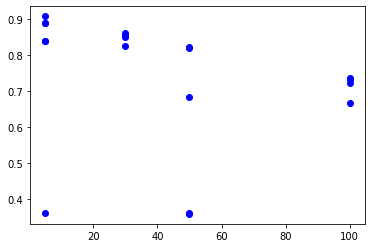

In [19]:
plt.plot(grid_results['param_min_samples_split'],
         grid_results['mean_test_score'],
        'bo')

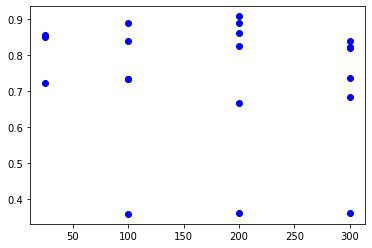

In [20]:
plt.plot(grid_results['param_n_estimators'],
         grid_results['mean_test_score'],
        'bo')

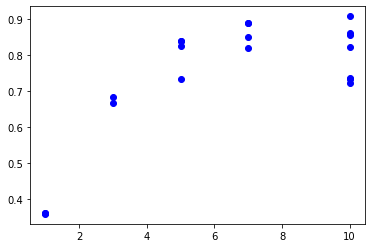

In [21]:
plt.plot(grid_results['param_max_depth'],
         grid_results['mean_test_score'],
        'bo')

In [35]:


rf = RandomForestRegressor(random_state=SEED,
                           n_jobs=-1)

params = {
    'max_depth': [5,6,7],
    'min_samples_split': [5,10],
    'n_estimators': [150,200,250]
}    

grid_search = GridSearchCV(rf,
                          params,
                          cv = k,
                          n_jobs=-1,
                          )

grid_search.fit(X,Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=8,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
   

In [36]:
grid_search.best_score_

0.8880439254301241

In [37]:
final_model = grid_search.best_estimator_

In [38]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 250}